In [606]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)

studmath = pd.DataFrame()
studmath = pd.read_csv('stud_math.csv')


In [607]:
''' 
1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике'''

" \n1 school — аббревиатура школы, в которой учится ученик\n\n2 sex — пол ученика ('F' - женский, 'M' - мужской)\n\n3 age — возраст ученика (от 15 до 22)\n\n4 address — тип адреса ученика ('U' - городской, 'R' - за городом)\n\n5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)\n\n6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)\n\n7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\n\n8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\n\n9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)\n\n10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)\n\n11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, '

In [608]:
display(studmath.head(10))
studmath.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [609]:
dfl = studmath.nlargest(5, 'score')
dfl

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
110,GP,M,15,U,LE3,A,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
113,GP,M,15,U,LE3,T,4.0,2.0,teacher,other,course,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,3.0,5.0,2.0,3.0,10.0,95.0
286,GP,F,18,U,GT3,T,2.0,NaN,at_home,at_home,other,mother,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,yes,yes,no,4.0,3.0,3.0,2.0,5.0,95.0


In [610]:
dfs = studmath.nsmallest(5,'score')
dfs

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0


In [611]:
print(studmath.columns)

len(studmath.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')


30

In [612]:
pd.DataFrame(studmath['age'].value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [613]:
import pandas as pd
#'U' - городской, 'R' - за городом
adr = studmath['address']

studmath.address = studmath.address.astype(str).apply(lambda x:None if x.strip()==''else x)

pd.DataFrame(studmath['address'].value_counts())

#17 строк без адреса.

,address
U,295
R,83
nan,17


In [614]:
Nana(studmath['address'])
studmath['address'].value_counts()

U      295
R       83
nan     17
Name: address, dtype: int64

In [615]:
pd.DataFrame(studmath['famsize'].value_counts())
studmath.famsize = studmath.famsize.astype(str).apply(lambda x:None if x.strip()==''else x)
studmath.famsize.value_counts()
print('Количество детей из семьи размером более 3 человек = ',(studmath.famsize.value_counts()[0]))
print('Количество детей из семьи размером 3 и менее = ',(studmath.famsize.value_counts()[1]))
print('Пустых значений: ',(studmath.famsize.value_counts()[2]))

Количество детей из семьи размером более 3 человек =  261
Количество детей из семьи размером 3 и менее =  107
Пустых значений:  27


In [616]:
#'T' - живут вместе 'A' - раздельно
pd.DataFrame(studmath['Pstatus'].value_counts())
studmath.Pstatus=studmath.Pstatus.astype(str).apply(lambda x: None if x.strip()=='' else x)
studmath.Pstatus.value_counts()
print('Большинство детей совместно проживают с родителями, раздельно только ', studmath.Pstatus.value_counts()[1])
print('Пустых значений: ', studmath.Pstatus.value_counts()[2])

Большинство детей совместно проживают с родителями, раздельно только  45
Пустых значений:  36


In [617]:
#образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 
#3 - среднее специальное или 11 классов, 4 - высшее)
pd.DataFrame(studmath['Medu'].value_counts())
studmath.Medu=studmath.Medu.apply(lambda x:None if x == '' else x) 
#не понял почему не добавились 0 у NaN значений
print('Количество детей с матерью, у которой высшее',
'образование: ',studmath.Medu.value_counts().values[0])
print('Количество детей с матерью, у которой 5-9 классов: ',studmath.Medu.value_counts().values[1],
     '\nСреднее специальное:',studmath.Medu.value_counts().values[2])
print(studmath.Medu.value_counts())


Количество детей с матерью, у которой высшее образование:  131
Количество детей с матерью, у которой 5-9 классов:  102 
Среднее специальное: 97
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64


In [618]:
pd.DataFrame(studmath['Fedu'].value_counts())
studmath.Fedu=studmath.Fedu.apply(lambda x:None if x == '' else x) 
#не понял почему не добавились None у NaN значений
print('Количество детей с отцом, у которых среднее специальное',
'образование: ',studmath.Fedu.value_counts().values[1])
print('Количество детей с отцом, у которых 5-9 классов: ',studmath.Fedu.value_counts().values[0],
     '\nВысшее образование у',studmath.Fedu.value_counts().values[2],'отцов')
print(studmath.Fedu.value_counts())

Количество детей с отцом, у которых среднее специальное образование:  96
Количество детей с отцом, у которых 5-9 классов:  106 
Высшее образование у 88 отцов
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64


In [619]:
#'teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 
#'at_home' - не работает, 'other' - другое
studmath.Mjob = studmath.Mjob.astype(str).apply(lambda x:None if x.strip()=='' else x)
studmath.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
nan          19
Name: Mjob, dtype: int64

In [620]:
studmath.Fjob = studmath.Fjob.astype(str).apply(lambda x:None if x.strip()=='' else x)
studmath.Fjob.value_counts()

other       197
services    102
nan          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [621]:
#'home' - близость к дому, 'reputation' - репутация школы, 
#'course' - образовательная программа,'other' - другое
studmath.reason = studmath.reason.astype(str).apply(lambda x:None if x.strip()=='' else x)

studmath.reason.value_counts()
print('Образовательная программа, близость к дому и репутация\nоказались важнейшими факторами при выборе школы,\nно обр. программа может привлечь детей из загорода')

Образовательная программа, близость к дому и репутация
оказались важнейшими факторами при выборе школы,
но обр. программа может привлечь детей из загорода


In [622]:
studmath.guardian = studmath['guardian'].astype(str).apply(lambda x:None if x.strip()=='' else x)
print(studmath.guardian.value_counts())

print('Количество потенциально из неблагополучной семьи = ', studmath.guardian.value_counts()[3])

mother    250
father     86
nan        31
other      28
Name: guardian, dtype: int64
Количество потенциально из неблагополучной семьи =  28


1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

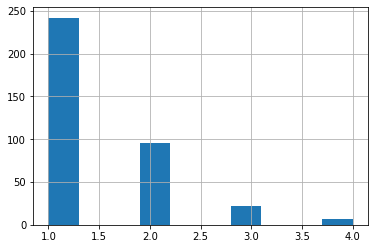

In [623]:
#1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин
studmath.traveltime = studmath.traveltime.apply(lambda x:0 if x == '' else x)
studmath.traveltime.hist()
studmath.traveltime.value_counts()



In [624]:
studmath.traveltime.fillna(0)

studmath.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

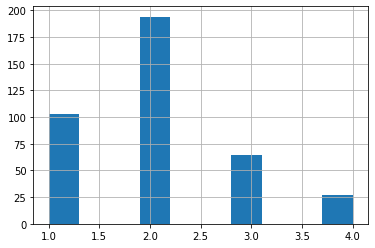

In [625]:
# время на учёбу помимо школы в неделю  
# (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
studmath.studytime.hist()
studmath.studytime.value_counts()


In [626]:
studmath.failures= studmath.failures.apply(lambda x: x if 1<=x<3 else 4)
#n, если 1<=n<3, иначе 4    -  просто сделал как написано... но не понял зачем.
studmath.failures.value_counts()

4.0    330
1.0     49
2.0     16
Name: failures, dtype: int64

4.0    330
1.0     49
2.0     16
Name: failures, dtype: int64

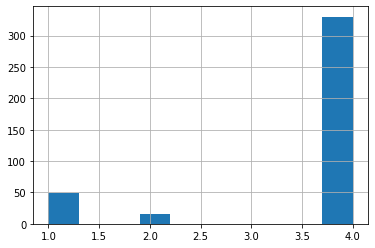

In [627]:
studmath.failures.hist()
studmath.failures.value_counts()


In [628]:
studmath.schoolsup = studmath.schoolsup.astype(str).apply(lambda x: None if x.strip()=='' else x)
studmath.schoolsup.value_counts()

no     335
yes     51
nan      9
Name: schoolsup, dtype: int64

In [629]:
def Nana(s):
    stringer = lambda x: None if x.strip()=='' else x
    for x in s:
        stringer(x)        


In [630]:
studmath['famsup'] = studmath.famsup.astype(str)
studmath.famsup

0       no
1      yes
2       no
3      yes
4      yes
      ... 
390    yes
391     no
392     no
393     no
394     no
Name: famsup, Length: 395, dtype: object

In [631]:
Nana(studmath.famsup)

In [632]:
studmath.famsup.value_counts()

yes    219
no     137
nan     39
Name: famsup, dtype: int64

In [633]:
studmath['paid']= studmath.paid.astype(str)
Nana(studmath.paid)
studmath.paid.value_counts()

no     200
yes    155
nan     40
Name: paid, dtype: int64

In [634]:
studmath.activities = studmath.activities.astype(str)
Nana(studmath.activities)
studmath.activities.value_counts()

yes    195
no     186
nan     14
Name: activities, dtype: int64

In [635]:
studmath.nursery = studmath.nursery.astype(str)
Nana(studmath.nursery)
studmath.nursery.value_counts()

yes    300
no      79
nan     16
Name: nursery, dtype: int64

In [636]:
studmath.higher = studmath.higher.astype(str)
Nana(studmath.higher)
studmath.higher.value_counts()

yes    356
nan     20
no      19
Name: higher, dtype: int64

In [637]:
studmath.internet = studmath.internet.astype(str)
Nana(studmath.internet)
studmath.internet.value_counts()

yes    305
no      56
nan     34
Name: internet, dtype: int64

In [638]:
studmath.romantic = studmath.romantic.astype(str)
Nana(studmath.romantic)
studmath.romantic.value_counts()

no     240
yes    124
nan     31
Name: romantic, dtype: int64

In [639]:
studmath = studmath.loc[studmath.famrel>=0]
studmath.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

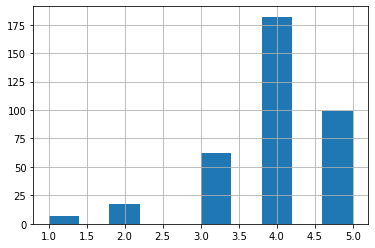

In [640]:
#от 1 - очень плохо до 5 - очень хорошо
#studmath.famrel.astype(int).apply(lambda x:None if x<1 or x>5 else x)
        
studmath.famrel.hist()
studmath.famrel.value_counts()

3.0    141
4.0    105
2.0     58
5.0     36
1.0     17
Name: freetime, dtype: int64

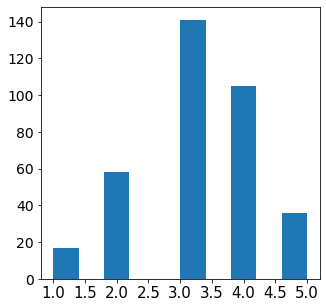

In [641]:
#свободное время после школы (от 1-очень мало до 5-очень мого)
studmath.freetime.hist(label = 'Свободное время',figsize =(5,5) , xlabelsize =15,ylabelsize =14,grid = False )
studmath.freetime.value_counts()


3.0    120
2.0     94
4.0     77
5.0     48
1.0     20
Name: goout, dtype: int64
Дети, которые очень много проводят время с друзьями,что может
что может сказаться на математике, составляет:  48


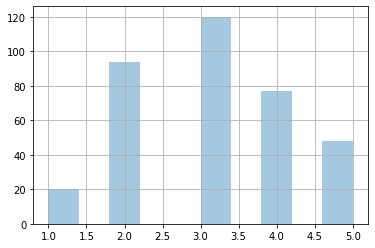

In [642]:
#от 1 - очень мало до 5 - очень много
studmath.goout.hist(alpha = 0.4)
print(studmath.goout.value_counts())
print('Дети, которые очень много проводят время с друзьями,что может\nчто может сказаться на математике, составляет: ',studmath.goout.value_counts()[5])

2.0     42
1.0     43
4.0     60
3.0     87
5.0    120
Name: health, dtype: int64

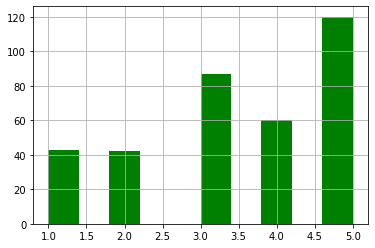

In [643]:
#состояние здоровья.
studmath.health.hist(facecolor = 'green')
studmath.health.value_counts().sort_values()

In [659]:
#Количество пропущенных занятий
studmath.absences.fillna("no data",inplace = True)
studmath.absences.value_counts()
for x in studmath.absences:
    if x!='no data':
        int(x)
    else:
        x
studmath.absences.describe()


count     367.0
unique     36.0
top         0.0
freq      100.0
Name: absences, dtype: float64